In [1]:
import torch 
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
words = open('names.txt','r') .read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [10]:
block_size=3 
X,Y = [],[]
for w in words[:5]:
    print(w)
    
    context = [0]*block_size
    for ch in w +'.':
        # print(ch)
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix] )
        context = context[1:] + [ix] #crop and append 

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [14]:
# converting 27 dimesntion into 2 dimension lookup sapce 
C = torch.randn((27,2))
C

tensor([[-0.2083, -0.4621],
        [-1.0806, -0.4659],
        [-0.2242, -0.6150],
        [ 1.1574, -0.5633],
        [ 0.7722,  1.3370],
        [ 0.5129, -0.5841],
        [ 0.0960,  0.2531],
        [-0.1081, -0.2200],
        [-0.4816,  1.5123],
        [-0.7295,  0.1149],
        [ 0.0805, -1.8379],
        [ 1.2840, -0.4023],
        [-1.1707,  0.2185],
        [ 0.1347, -0.5181],
        [ 0.4191,  0.4557],
        [ 0.4137,  0.1880],
        [-0.3994,  0.4889],
        [ 1.7330, -1.2958],
        [-3.5939,  0.2733],
        [ 0.4565, -0.8846],
        [-0.0637, -1.2511],
        [ 0.6540,  0.2579],
        [-0.6926, -0.8409],
        [ 0.3220, -0.0145],
        [ 0.3992, -0.0160],
        [-1.1754,  0.0604],
        [ 0.8875,  0.0444]])

In [16]:
# to get embedding of 5 value 
C[5]

tensor([ 0.5129, -0.5841])

In [19]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [20]:
W1 = torch.randn ((6,100)) 
b1 = torch.randn (100)

In [30]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [24]:
# its not possible to direclty multipe W1 with emb vetor. So , we each emb vecotr and connecting with the other 
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([32, 6])

In [25]:
# to make it dynamic on the blcok size 
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [26]:
emb.view(32,6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [33]:
h=emb.view(32,6) @ W1 +b1
h = emb.view(emb.shape[0],6 ) @ W1 + b1 #inorder to not hardcode the value of value 
h.shape

torch.Size([32, 100])

In [35]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 +b1)
h

tensor([[-0.8936, -0.8340, -0.9217,  ..., -0.3022, -0.9039,  0.4577],
        [-0.7859, -0.7625, -0.6712,  ..., -0.2680, -0.7960,  0.8278],
        [-0.9199, -0.8500, -0.4453,  ...,  0.7303, -0.9572,  0.9928],
        ...,
        [-0.7706, -0.8062, -0.5810,  ...,  0.5779,  0.3040, -0.9999],
        [-0.9514,  0.6159,  0.2949,  ..., -0.9273,  0.8366, -0.9970],
        [-0.2808, -0.7293, -0.9167,  ..., -0.9932,  0.7251, -0.8787]])

In [36]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [38]:
logits = h @ W2 + b2 
logits.shape

torch.Size([32, 27])

In [39]:
counts = logits.exp()
prob = counts/ counts.sum(1,keepdim=True)


In [40]:
loss = - prob[torch.arange(32), Y ] .log().mean()
loss 

tensor(11.7466)

## Summary 

In [42]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g) 
W1 = torch.randn ((6,100),generator=g)
b1 =torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g) 
b2 = torch.randn (27,generator=g)

In [45]:
parameters = [C,W1,b1,W2,b2]
sum(p.nelement() for p in parameters)#number of parameters in total

3481

In [46]:
emb =C[X] #(32,3,2)
h = torch.tanh(emb.view(emb.shape[0],6)@ W1 +b1)#(32,100)
logits = h@W2+ b2
counts = logits.exp()
prob = counts/ counts.sum(1,keepdim=True)
loss = - prob[torch.arange(32),Y].log().mean()
loss

tensor(17.7697)

In [47]:
# The last 3 lines are basically samething as cross entropy
F.cross_entropy(logits,Y)

tensor(17.7697)

In [50]:
for p in parameters:
    p.requires_grad=True

In [53]:
for _ in range(1000):
# Forward pass 
    emb =C[X] #(32,3,2)
    h = torch.tanh(emb.view(emb.shape[0],6)@ W1 +b1)#(32,100)
    logits = h@W2+ b2
    loss = F.cross_entropy(logits,Y)
    print(loss.item())
    # backward pass 
    for p in parameters: 
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.1* p.grad  

0.31282907724380493
0.3119065761566162
0.31100672483444214
0.3101293742656708
0.30927401781082153
0.30844077467918396
0.30762889981269836
0.30683812499046326
0.30606788396835327
0.30531764030456543
0.30458709597587585
0.3038754165172577
0.30318212509155273
0.30250680446624756
0.301848828792572
0.30120766162872314
0.3005825877189636
0.2999732196331024
0.2993791401386261
0.29879963397979736
0.2982342839241028
0.2976827621459961
0.2971442937850952
0.29661864042282104
0.29610544443130493
0.29560405015945435
0.29511427879333496
0.2946355938911438
0.294167697429657
0.2937101423740387
0.2932628393173218
0.2928251028060913
0.29239681363105774
0.29197773337364197
0.2915674149990082
0.29116564989089966
0.2907722294330597
0.29038679599761963
0.29000914096832275
0.2896389961242676
0.289276123046875
0.28892046213150024
0.2885715663433075
0.28822946548461914
0.28789371252059937
0.28756436705589294
0.2872411012649536
0.286923885345459
0.28661227226257324
0.28630635142326355
0.2860058844089508
0.28571

## Training on full dataesets

In [55]:
block_size = 3 
X,Y = [] ,[]
for  w in words:
     
    context =[0] * block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        
        context = context[1:] + [ix]
        
X =torch.tensor(X)
Y =torch.tensor(Y) 

In [56]:
print(X.shape)

torch.Size([228146, 3])


In [61]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g) 
W1 = torch.randn ((6,100),generator=g)
b1 =torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g) 
b2 = torch.randn (27,generator=g)
parameters = [C,W1,b1,W2,b2]

for p in parameters:
    p.requires_grad=True
    

for _ in range(100):
# Forward pass 
    ix = torch.randint(0,X.shape[0],(32,))# Creating mini batch with random numebers from 0 to X.shape[0] with count 32 
    
    emb =C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(emb.shape[0],6)@ W1 +b1)#(32,100)
    logits = h@W2+ b2
    loss = F.cross_entropy(logits,Y[ix])
    print(loss.item())
    # backward pass 
    for p in parameters: 
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.1* p.grad  

19.2501277923584
18.636089324951172
15.473938941955566
13.796603202819824
14.881563186645508
13.62557315826416
14.202897071838379
10.776216506958008
13.406094551086426
11.403223037719727
9.4548978805542
11.131024360656738
12.167771339416504
11.878947257995605
10.357124328613281
9.105565071105957
8.285313606262207
8.753983497619629
8.537542343139648
8.790872573852539
10.036479949951172
7.67782735824585
7.503515720367432
6.3933186531066895
8.046467781066895
8.029184341430664
5.531367301940918
5.587625503540039
5.775862693786621
7.053115367889404
7.181097030639648
6.318873882293701
5.4502363204956055
7.4878973960876465
6.944594860076904
7.423247814178467
6.457000732421875
6.363874435424805
5.669757843017578
7.450831413269043
7.448351860046387
7.5276384353637695
5.895112991333008
5.823366641998291
6.894989490509033
5.607303619384766
4.889206886291504
5.362459182739258
5.89415979385376
4.258668899536133
4.624117851257324
4.340986728668213
5.259710788726807
5.736165523529053
6.62959527969360

In [63]:
## To Find optimal learning rate 
# intead of creating linear spaced intervaled learning, we use exponential learning rate
lre= torch.linspace(-3,0,1000)
lrs = 10 **lre 
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [66]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g) 
W1 = torch.randn ((6,100),generator=g)
b1 =torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g) 
b2 = torch.randn (27,generator=g)
parameters = [C,W1,b1,W2,b2]

for p in parameters:
    p.requires_grad=True
    

lri = []
lossi =[] 

for i in range(1000):
# Forward pass 
    ix = torch.randint(0,X.shape[0],(32,))# Creating mini batch with random numebers from 0 to X.shape[0] with count 32 
    
    emb =C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(emb.shape[0],6)@ W1 +b1)#(32,100)
    logits = h@W2+ b2
    loss = F.cross_entropy(logits,Y[ix])
    print(loss.item())
    # backward pass 
    for p in parameters: 
        p.grad = None
    loss.backward()

    # Update 
    lr =lrs[i]
    for p in parameters:
        p.data += -lr* p.grad  
        
    # Track stat
    lri.append(lr)
    lossi.append(loss.item())

17.409502029418945
19.91779899597168
18.659589767456055
18.584014892578125
19.777137756347656
20.63079071044922
20.019853591918945
19.949947357177734
17.415313720703125
19.328170776367188
18.109176635742188
19.277040481567383
20.53350067138672
19.44778060913086
19.807828903198242
17.55607795715332
19.547096252441406
17.097606658935547
22.84703254699707
22.98715591430664
21.08094024658203
18.796152114868164
20.43331527709961
15.724438667297363
19.140653610229492
19.817171096801758
19.68336296081543
18.926834106445312
19.191959381103516
22.541563034057617
19.422203063964844
17.215728759765625
16.861024856567383
21.399324417114258
14.45319652557373
16.760337829589844
18.55281639099121
18.651060104370117
18.919382095336914
16.596336364746094
20.786611557006836
17.683578491210938
16.17313003540039
20.83933448791504
16.319292068481445
17.439668655395508
16.15376091003418
16.666337966918945
14.463339805603027
15.695432662963867
17.922224044799805
19.218421936035156
21.021867752075195
18.20966

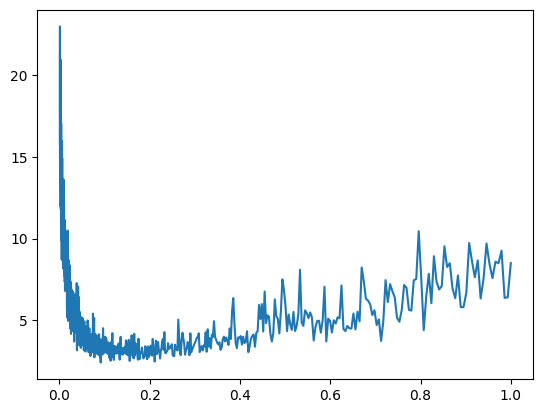

In [72]:
plt.plot(lri,lossi)

In [73]:
#  we fix the learning rate to be 0.1 

g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator=g) 
W1 = torch.randn ((6,100),generator=g)
b1 =torch.randn(100, generator=g)
W2 = torch.randn((100,27),generator=g) 
b2 = torch.randn (27,generator=g)
parameters = [C,W1,b1,W2,b2]

for p in parameters:
    p.requires_grad=True
    

for _ in range(10000):
# Forward pass 
    ix = torch.randint(0,X.shape[0],(32,))# Creating mini batch with random numebers from 0 to X.shape[0] with count 32 
    
    emb =C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(emb.shape[0],6)@ W1 +b1)#(32,100)
    logits = h@W2+ b2
    loss = F.cross_entropy(logits,Y[ix])
    print(loss.item())
    # backward pass 
    for p in parameters: 
        p.grad = None
    loss.backward()

    # Update 
    for p in parameters:
        p.data += -0.1* p.grad  

19.157167434692383
20.198434829711914
19.121349334716797
15.115333557128906
14.852224349975586
9.918902397155762
12.417424201965332
9.865775108337402
11.22657299041748
12.414044380187988
9.274862289428711
10.386466979980469
8.491686820983887
10.81029987335205
11.44781494140625
10.19073486328125
8.538935661315918
9.925521850585938
8.327747344970703
9.175722122192383
7.240238666534424
7.470189571380615
7.154988765716553
6.6786699295043945
10.473246574401855
6.572909832000732
8.199142456054688
9.056434631347656
9.050153732299805
5.868957042694092
7.366438388824463
6.458074569702148
6.873668193817139
7.467374801635742
7.3954176902771
7.1854376792907715
5.924837589263916
6.967641353607178
5.221656322479248
6.114781379699707
4.78179407119751
5.689029693603516
5.980862617492676
7.355828762054443
5.995298385620117
6.737624645233154
6.536157608032227
4.401592254638672
5.648248672485352
5.891086101531982
5.5729265213012695
5.445967674255371
5.226922512054443
5.715488910675049
4.912179946899414
5